# Assignment11 : Image Denoising
# Name : Eun-Mi Joo
# Student ID : 20155714
# GitHub Link : https://github.com/joo228/assignment.git

# import package for plotting, data management and dealing image

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
from scipy.sparse import csr_matrix
from scipy.sparse import lil_matrix
from scipy import sparse
from scipy import linalg
from scipy.sparse.linalg import lsqr

# read image and make noise in image

In [34]:
file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = [0.2,0.4,0.6]
noise1      = np.random.normal(0, noise_std[0], (row, col))
noise2      = np.random.normal(0, noise_std[1], (row, col))
noise3      = np.random.normal(0, noise_std[2], (row, col))

im_noise1    = im + noise1
im_noise2    = im + noise2
im_noise3    = im + noise3

noise_image1 = np.array(im_noise1).reshape((row*col,1))
noise_image2 = np.array(im_noise2).reshape((row*col,1))
noise_image3 = np.array(im_noise3).reshape((row*col,1))

(-0.5, 299.5, 204.5, -0.5)

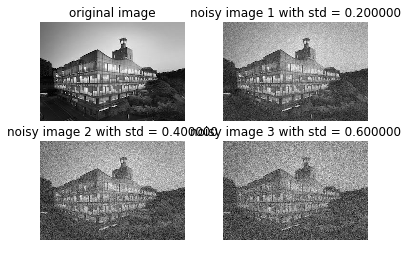

In [35]:
p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image 1 with std = %f' %noise_std[0])
plt.imshow(noise_image1.reshape((row, col)), cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('noisy image 2 with std = %f' %noise_std[1])
plt.imshow(noise_image2.reshape((row, col)), cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,4)
p2.set_title('noisy image 3 with std = %f' %noise_std[2])
plt.imshow(noise_image3.reshape((row, col)), cmap='gray')
plt.axis('off')

# define difference matrix by x and y

In [36]:
Dx = csr_matrix((row*col-3, row*col), dtype = np.int)
temp = csr_matrix((row-1,row), dtype = np.int)
temp.setdiag(-1, 0)
temp.setdiag(1, 1)
Dy = csr_matrix((col*(row-1), row*col), dtype = np.int)
Dx.setdiag(-1, 0)
Dx.setdiag(1, 3)
for i in range(col):
    Dy[0+i*(row-1):row-1+i*(row-1),0+i*row:row+i*row]=temp

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


# define train noise

In [47]:
def training(ramda, noise_image, dx, dy):
    dx = np.sqrt(ramda)*dx
    dy = np.sqrt(ramda)*dy
    A = sparse.vstack((sparse.eye(row*col), dx, dy), format='csr')
    b = np.concatenate((noise_image, np.zeros((row*col-3,1)), np.zeros((col*(row-1),1))))
    
    (im_recon, istop, itn, r1norm, r2norm) = lsqr(A,b)[:5]
    
    im_recon = im_recon.reshape(row, col)
    Error = r2norm
    p1 = plt.subplot(2,2,1)
    p1.set_title('original image')
    plt.imshow(im, cmap='gray')
    plt.axis('off')

    p2 = plt.subplot(2,2,2)
    p2.set_title('noisy image')
    plt.imshow(noise_image.reshape((row, col)), cmap='gray')
    plt.axis('off')

    p3 = plt.subplot(2,2,3)
    p3.set_title('reconstruction')
    plt.imshow(im_recon, cmap='gray')
    plt.axis('off')
    noise_recon = im_noise-im_recon.reshape(row, col)
    p4 = plt.subplot(2,2,4)
    p4.set_title('estimated noise')
    plt.imshow(noise_recon, cmap='gray')
    plt.axis('off')

    plt.show()
    return Error

# image reconstruction with varying noise std and ramda

with noise std is 0.200000


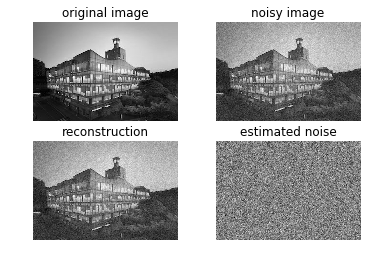

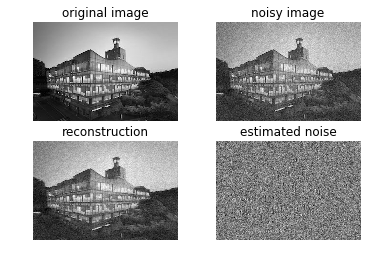

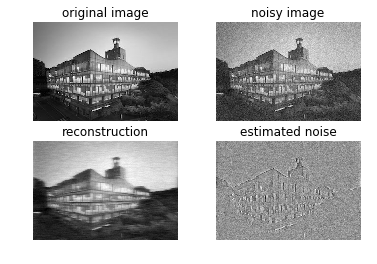

with noise std is 0.400000


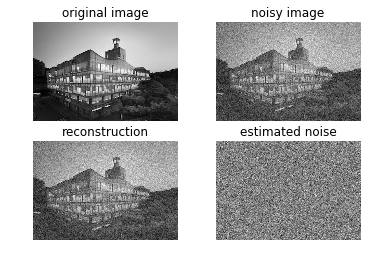

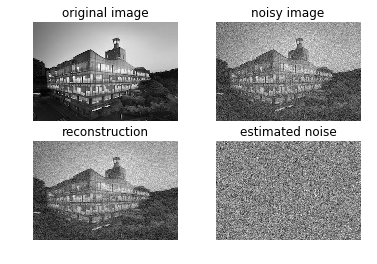

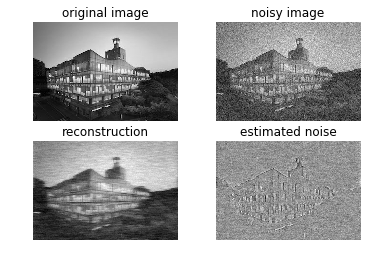

with noise std is 0.600000


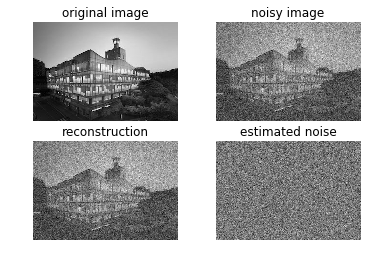

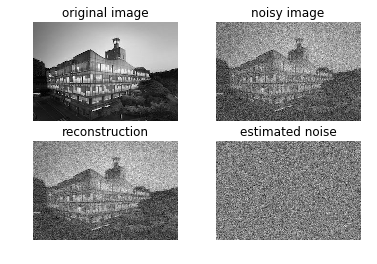

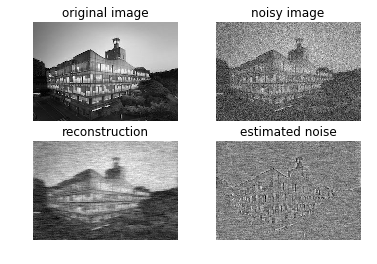

In [48]:
ramda = np.array([10**(-2), 10**(-1), 1])
noise_images = [noise_image1, noise_image2, noise_image3]
error = np.empty((len(noise_images),len(ramda)),dtype = float)
for i in range(len(noise_images)):
    print ("with noise std is %f" %noise_std[i])
    for j in range(len(ramda)):
        error[i][j] = training(ramda[j],noise_images[i] , Dx, Dy)

# show the error of reconstruction

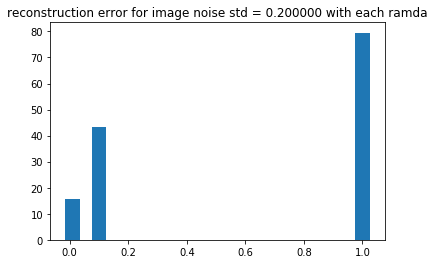

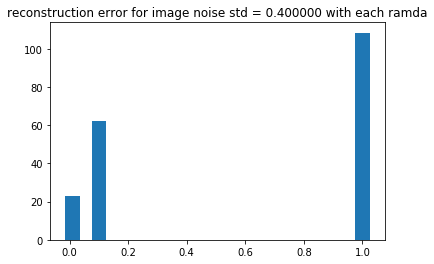

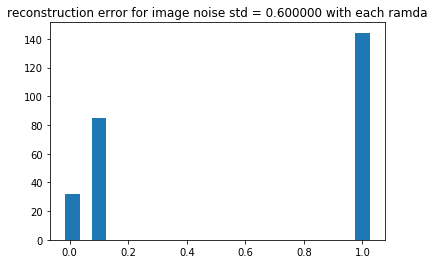

In [54]:
for i in range(len(noise_images)):
    plt.bar(ramda, error[i,:], width = 0.05)
    plt.title("reconstruction error for image noise std = %f with each ramda"%noise_std[i])
    plt.show()